# Прикладная статистика. ДЗ 1.
# Академия Аналитиков Авито

__Правила:__
- Финальный дедлайн: **2022-11-30 23:59**. 
- После того как ваше решение проверят и ответят, вам дается неделя на исправление тех задач, о которых скажет проверяющий. Ответ и обсуждение решения — в телеграме.

- Выполненную работу нужно отправить
    - в чатик HW1-<ваше имя> через бота @AAA_stats23_bot
    - или в личные сообщения боту.
- В качестве решения нужно отправить файл ipynb. Ссылка на интернет-ресурсы не принимается. Не публикуйте решения в открытом доступе!
- Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. **При этом можно добавлять новые ячейки!**
- в ячейках с комменарием `#Автопроверка` нужно заполнить содержимое функций и классов (если есть), которые будут уже объявлены в этой ячейке. При этом:
    - Нельзя убрирать или переставять `#Автопроверка` в ячейке. 
    - Нельзя менять сигнатуру и возвращаемое значение функций. То есть добавлять любой код можно, но удалять, что уже написано - нельзя.
    - Нельзя ничего импортировать в таких ячейках. Все доступные для использования библиотеки будут указаны заранее. Такие слова, как `import`, `globals`, `locals`, `eval`, `exec` также нельзя использовать внутри ячеек.
    - Нельзя использовать библиотеки, кроме тех, что указаны в задании. Ваш код должен работать именно с эти набором библиотек без любого дополнительного импорта!
    - Нельзя использовать код из других ячеек ноутбука (кроме ячейки с импортом, в которой указаны все доступные библиотеки). Единственное исключение - если вы проставите в начало такой ячейки слово `#Автопроверка`. Тогда вы можете использовать код из этой ячейки.
    - В случае нарушения этого правила автопроверка будет провалена и вы не получите часть баллов за задачу. 
    - В случае, если есть несколько ячеек автопроверки, то в каждой такой ячейке можно использовать созданные вами функции (или классы) из других ячеек автопроверки.

In [1]:
from collections import namedtuple
from scipy.stats import binom
import math
import numpy as np
import pandas as pd

# Общие замечания по задачам с автопроверкой

Во всех задачах далее, где потребуется автопроверка, можно использовать только следующие библиотеки:

```
from collections import namedtuple
from scipy.stats import binom
import math
import numpy as np
```

Еще раз обращаем внимание, что в ячейках автопроверки __не__ должны быть импортированы какие-либо библиотеки. В других ячейках импортировать библиотеки можно, но при проверке использованы будут только указанные.

## Задача 1. 3 балла

[Осьминог Пауль](https://www.championat.com/football/article-3238881-samye-izvestnye-zhivotnye-predskazateli.html) 14 раз пробовал угадать победителя футбольного матча.
12 раз он угадал правильно, 2 раза — ошибся. Мы хотим проверить гипотезу:

 - $H_0$: осьминог угадывает победителя матча с вероятностью 0.5
 - $H_1$: осьминог выбирает победителя  матча с вероятностью $\neq$ 0.5

#### Пункт А. 1 балл: 

### На зачет

Вам нужно разработать статистический критерий для проверки этой гипотезы, а также посчитать p-value.

## Решение

Назовем конверсией отношение числа угаданных Паулем результатов матчей, к общему числу.<br>
Тогда необходимо на основании наблюдеемой конверсии определить истинную.<br>
Или же абстрактный вопрос задачи заключается в том, что достаточно ли на самом деле данных, чтобы утверждать, что конверсия больше 0.5.

Не обладая аппаратом мат статистики, мы бы сказали, что раз 12/14 больше 0.5, то осьминог угадывает победителя с вероятностью больше, чем 0.5. Но раз мы им обладаем (не очень), то мы сделаем всё по-хорошему и получим ответ на этот вопрос.

Гипотезы сформулированны так:

 - $H_0$: осьминог угадывает победителя матча с вероятностью 0.5
 - $H_1$: осьминог выбирает победителя  матча с вероятностью $\neq$ 0.5

Введем случауную величину: $X_i$ <br>
Пусть она равне 1, если Пауль сделал верный прогноз, 0 - иначе

$X_i$ будет распределена по закону Бернулли с параметром $\mu$, <br>
$\mu$ - вероятность успешного угадывания (это истинная вероятность, она нам неизвестна).

 - Рассмотрим статистику  $T(X^n) = \underset{i=1}{\overset{n}{\sum}} X_i$, Если ${H_0}$ верна, то $\ T \overset{H_0}{\sim} \text{Binom} (\mu)$

Пусть нас устраивает ошбика первого рода в 7%, то есть $\alpha = 0.07$ 

Посмотрим на наше распределение:

In [2]:
from matplotlib import pyplot
pyplot.style.use('dark_background')

In [3]:
N = 14
mu0 = 0.5

x = np.arange(start=0, stop=N+1)
y = binom.pmf(x, N, mu0)

<function matplotlib.pyplot.show(close=None, block=None)>

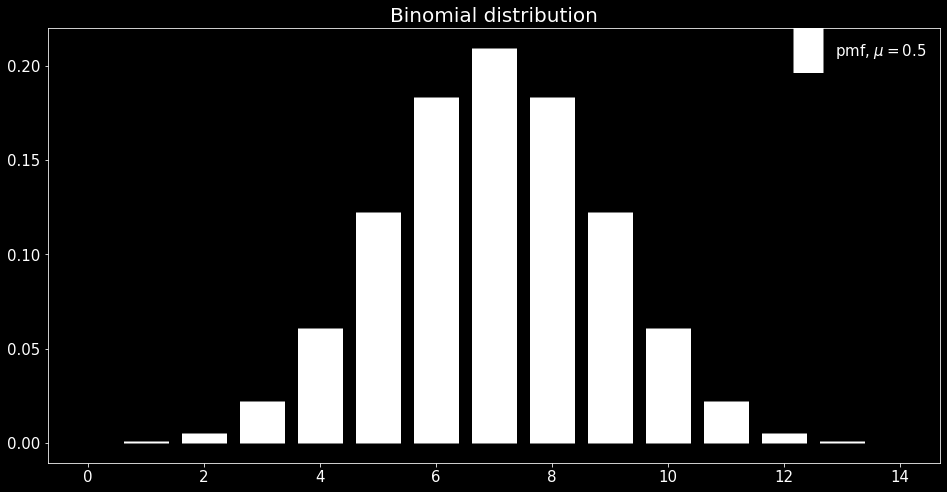

In [4]:
pyplot.figure(figsize=(16, 8))

pyplot.vlines(x, 0, y, colors='w', linestyles='-', linewidth=45.0, label='pmf, $\mu = 0.5$')

pyplot.title('Binomial distribution', fontsize=20)
pyplot.legend(loc='best', frameon= False, prop={'size': 15})
pyplot.xticks(fontsize=15)
pyplot.yticks(fontsize=15)
pyplot.show

In [5]:
alpha_max = 0.07

In [6]:
critical_right = binom.ppf(1-alpha_max/2, n=14, p=0.5) + 1
critical_left = binom.ppf(alpha_max/2, n=14, p=0.5) - 1

print(f'if k <= {critical_left} or k >= {critical_right} then reject H0')

if k <= 3.0 or k >= 11.0 then reject H0


Альфа 0.5 это максимальное значение, а истинная альфа будет равно:

In [7]:
alpha = (
    1 - binom.cdf(critical_right - 1, n=14, p=0.5)
    + binom.cdf(critical_left, n=14, p=0.5)
)
alpha

0.057373046875

Истинное значение альфа получилось не сильно меньше максимального, что ок

Теперь значение получилось более близким к 0.05. Если мы добавим ещё один столбец справа или слева, то уже получим значение больше 0.05, поэтому остановимся на этом.

Найдем значение p_value. <br>
pvalue - это вероятность того, чтобы при уловии верной H0 мы получили 12 + правильных угадываний.

In [8]:
k = 12
N = 14
mu0 = 0.5

p_value_one_side = 1 - binom.cdf(k-1, n=N, p = mu0)

if p_value_one_side > 0.5:
    p_value_one_side = binom.cdf(k, n=N, p = mu0)


p_value_two_sides = p_value_one_side * 2

if p_value_two_sides > 1:
    p_value_two_sides = 1

p_value_two_sides

0.012939453125

In [9]:
if p_value_two_sides <= alpha_max:
    print('reject H0')
else:
    print('do not reject H0')

reject H0


То есть такое значение (12+) очень плохо объясняется нулевой гипотезой. Поэтому мы сколняемся к альтернативной.

Реализуем это в виде функции:

Реализуйте критерий `check_paul_criterion(n, k, alpha)`, где 
- `n` &mdash; количество матчей;
- `k` &mdash; количество верных предсказаний от осьминога;
- `alpha` &mdash; уровень значимости критерия.

Функция должна вернуть `PaulCheckResults` с полями
- is_rejected: отверглась или нет гипотеза H_0 на уровне значимости alpha
- pvalue


In [10]:
# Автопроверка

PaulCheckResults = namedtuple('PaulCheckResults', ['is_rejected', 'pvalue'])

def check_paul_criterion(n: int, k: int, alpha: float = 0.05):
    """
    Параметры:
    - n: количество матчей
    - k: количество верных предсказаний от осьминога
    - alpha: уровень значимости критерия.
        
    Возвращает:
    - PaulCheckResults с полями:
        - is_rejected: bool
            - отверглась или нет гипотеза H_0 
                       на уровне значимости alpha
        - pvalue: float
    """

    is_rejected = None
    pvalue = None

    p_value_one_side = 1 - binom.cdf(k-1, n=N, p = mu0)

    if p_value_one_side > 0.5:
        p_value_one_side = binom.cdf(k, n=N, p = mu0)


    p_value_two_sides = p_value_one_side * 2

    if p_value_two_sides > 1:
        p_value_two_sides = 1
    
    pvalue = p_value_two_sides
    
    if p_value_two_sides <= alpha_max:
        is_rejected = True
    else:
        is_rejected = False
    
    

    return PaulCheckResults(is_rejected, pvalue)


In [11]:
check_paul_criterion(14, 12, 0.07)

PaulCheckResults(is_rejected=True, pvalue=0.012939453125)

#### Пункт B. 2 балла: 

Какие выводы можно сделать из полученного результата?

## Вывод

С одной стороны, мы можем сделать вывод о том, что раз мы отвергли нулевую гипотезу, значит осьминог угодывает команду победителя с вероятностью не равной 0.5, то есть неслучайно. Значит можно пожалеть о том, что осьминог Пауль (Ванга) умер, ведь теперь нельзя заработать на ставках.

Но с другой стороны, pvalue(=0.012939453125) - это вероятность получить такие или более экстремальные значения при условии справедливости нулевой гипотезы. Это вероятность мала. НО!!! И маловероятные события тоже происходят. И именно маловерятные события получают большую огласку, например как это и другие описанные в этой [статье.](https://www.championat.com/football/article-3238881-samye-izvestnye-zhivotnye-predskazateli.html)

<div class="alert alert-info">  Update:<br>

Если бы мы сначала поставили гипотезу, а потом провели эксперимент, то могли бы говорить, что Пауль угадывает неслучайно на уроввне значимости 7%.<br>

Но наша ошибка была в том, что мы переобучились под результат, так как поставили гипотезу после эксперимента, по-хорошему нужно было поставить гипотезу, а затем провести повторный эксперимент и на новых данных проверить возможности Пауля. </div>

## Задача 2. 3 балла

### На зачет

Мы разработали новый дизайн нашего продукта. Вероятность, что он понравится случайному человеку — $p$, и она нам неизвестна. Мы хотим
проверить $H_0: p = 1$ с помощью статистического критерия c уровнем значимости $\alpha$. Предложить критерий для решения этой задачи.

## Решение

Сформулируем гипотезы:

 - $H_0: p = 1$
 - $H_1: p < 1$

Введем случауную величину: $X_i$ <br>
Пусть она равне 1, если человеку понравился запрос, 0 - иначе

$X_i$ будет распределена по закону Бернулли с параметром $p$, <br>
$p$ - вероятность, что новый дизайн понравится случайному человеку (она нам неизвестна)

 - Рассмотрим статистику  $T(X^n) = \underset{i=1}{\overset{n}{\sum}} X_i$

- alpha - вероятность ошибки первого рода. Бизнесово зададим равной 0.05

<div class="alert alert-info">  

P.S. получается, что при таких гипотезах и таком критерии и полагаясь на данную формулу $P_{H_0}(\sum_{i=1}^N X_i <= critvalue) = \alpha_0 <= \alpha$ получим, что истинная альфа равна 0. Так как critvalue = N-1, а p при $H_0$ равно 1.  Это норм?</div> 

- beta - вероятность ошибки второго рода, другими словами, вероятность ошибочно принять H0, то есть принять H0, если она неверна. Она будет равна $p^N$, где p - вероятность того, что дизайн понравился при верной $H_1$, N - количество юзеров. (То есть она равна вероятности того, что при p<1 все сконвертируются)

Мощность критерия равна 1 - $\beta$, то есть равна $1 - p^N$

Напишите функцию `calculate_number_of_users(alpha, beta, p)` — скольки людям нужно показать этот дизайн, чтобы добиться мощности `1 - beta` при заданном `p` и уровне значимости `alpha`.

P.S. Утверждается, что на наших тестах ответ не будет превосходить 1000 человек.

In [12]:
#Автопроверка

def calculate_number_of_users(alpha: float, beta: float, p: float):
    """
    Параметры:
    - alpha: уровень значимости
    - beta: инвертированная мощность критерия. мощность = 1 - beta.
    - p: истинная вероятность того, что пользователю понравится дизайн.
    Возвращает:
    - number_of_users: int
        - количество людей, которым надо показать дизайн.
    """
    number_of_users = None
    
    for n in range(1, 1001):
    
        true_beta = p ** n
        
        power = 1 - true_beta
        
        if power >= 1 - beta:
            number_of_users = n
            break


    return number_of_users

In [13]:
calculate_number_of_users(0.05, 0.2, 0.99)

161

## Задача 3.

По недостоверной информации (вероятность, что она верна, считаем за 1%), в новой версии нашего сайта есть сложнодетектируемый баг. Мы могли бы попросить разработку его отыскать и починить, но на это уйдет много ресурсов.

К счастью, у нас есть старый AB тест (новая версия сайта vs старая), который мы можем проанализировать и с некоторой вероятностью обнаружить наличие бага просто сравнением выборок. У нас есть три критерия для проверки гипотезы "$H_0$: бага нет, $H_1$: баг есть":
- критерий `A`: $\alpha = 0.02, 1-\beta = 0.50$
- критерий `B`: $\alpha = 0.05, 1-\beta = 0.60$
- критерий `C`: $\alpha = 0.10, 1-\beta = 0.70$

Если критерий находит баг, мы просим разработчиков потратить силы и починить. На это у них уйдет усилий на 1 М ₽ независимо от того, найдут они баг или нет.
Если критерий не найдет баг, затраты разработчиков будут нулевыми, но из-за бага мы потеряем в конечном итоге 50 М ₽.

#### Пункт А. 2 балла: 

Какой критерий стоит выбрать?

## Решение

Нам известны расходы в каждом случае, выведем их в виде таблицы:

In [14]:
colNames = ["Критерий нашел баг", "Критерий не нашел бага"]
dictTwo = {
    "Баг есть":['1 млн', '50 млн'],
    "Бага нет":['1 млн', '0 млн'],
}
df = pd.DataFrame.from_dict(dictTwo, orient='index', columns=colNames)
display(df)

,Критерий нашел баг,Критерий не нашел бага
Баг есть,1 млн,50 млн
Бага нет,1 млн,0 млн


Также нам известны параметры $\alpha$ и $\beta$ для каждого критерия.

Но по их определению мы знаем, что 
- $\alpha$ - вероятность отвергнуть нулевую гипотезу, если она верна (Критерий нашел баг, хотя бага нет)
- $\beta$ - вероятность принять нулевую гипотезу, если она неверна (Критерий не нашел баг, хотя баг есть)
- $power$ - вероятность отклонить нулевую, если она неверна (Критерий нашел баг и баг есть)

In [15]:
colNames = ["Критерий нашел баг", "Критерий не нашел бага"]
dictTwo = {
    "Баг есть":['$power$', '$beta$'],
    "Бага нет":['$alpha$', '--'],
}
df = pd.DataFrame.from_dict(dictTwo, orient='index', columns=colNames)
display(df)

,Критерий нашел баг,Критерий не нашел бага
Баг есть,$power$,$beta$
Бага нет,$alpha$,--


Чтобы определить какой критерий нужен, мы можем посчитать мат ожидание в каждом случае:

- Первый случай. Мы игнорировали информацию о том, что у нас есть баг, наши потенциальные расходы: 
    - Баг есть: 0.01*50
    - Бага нет: 0
- Второй случай. Мы приняли во внимание информацию, наши потенциальные расходы: 
    - Баг есть: $0.99*\alpha$
    - Бага нет: $0.01*(power + 50 * \beta)$

Напишем функцию, которая подсчитает мат ожидание, учитывая, что $power = 1 - \beta$:

In [16]:
def cost(alpha, power):
    return 0.01*50 + 0.99*alpha + 0.01*(power + (1-power)*50) 

In [17]:
print(f'Критерий А: {cost(0.02, 0.50)}')
print(f'Критерий Б: {cost(0.05, 0.60)}')
print(f'Критерий С: {cost(0.1, 0.70)}')

Критерий А: 0.7748
Критерий Б: 0.7555000000000001
Критерий С: 0.756


Наименьшее мат ожидание расходов показывает критерий Б: $\alpha = 0.05, power = 0.60$

#### Пункт B. 2 балла: 
Предложите оптимальную стратегию, если потери от ненайденного бага составят вместо 50М:
- 20М рублей;
- 3М рублей;
- 300М рублей.

In [18]:
def cost(alpha, power, exp):
    return 0.01*exp + 0.99*alpha + 0.01*(power + (1-power)*exp) 

#### Если расходы составляют 20М рублей

In [19]:
print(f'Критерий А: {cost(0.02, 0.50, 20)}')
print(f'Критерий Б: {cost(0.05, 0.60, 20)}')
print(f'Критерий С: {cost(0.1, 0.70, 20)}')

Критерий А: 0.32480000000000003
Критерий Б: 0.3355
Критерий С: 0.36600000000000005


Тогда наилучший критерий А: $\alpha = 0.02, power = 0.50$

#### Если расходы составляют 3М рублей

In [20]:
print(f'Критерий А: {cost(0.02, 0.50, 3)}')
print(f'Критерий Б: {cost(0.05, 0.60, 3)}')
print(f'Критерий С: {cost(0.1, 0.70, 3)}')

Критерий А: 0.0698
Критерий Б: 0.0975
Критерий С: 0.14500000000000002


Тогда наилучший критерий А: $\alpha = 0.02, power = 0.5$

#### Если расходы составляют 300М рублей

In [21]:
print(f'Критерий А: {cost(0.02, 0.50, 300)}')
print(f'Критерий Б: {cost(0.05, 0.60, 300)}')
print(f'Критерий С: {cost(0.1, 0.70, 300)}')

Критерий А: 4.5248
Критерий Б: 4.2555
Критерий С: 4.006


Тогда наилучший критерий C: $\alpha = 0.1, power = 0.7$

#### Небольшой вывод:

Чем больше сумма расходов при необнаружении бага, тем большую мощность критерия мы хотим потребовать.